In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import random
import numpy as np

# 讀入資料
mnist = input_data.read_data_sets("data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels
getint = random.randint(1,10001) # 1~10000隨機
print("取排列第" , getint , "張圖片")
# 檢視結構
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("---")

# 檢視一個觀測值
#print(x_train[1, :])
print(np.argmax(y_train[getint, :])) # 隨機一張訓練圖片的真實答案

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
取排列第 8906 張圖片
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
---
3


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


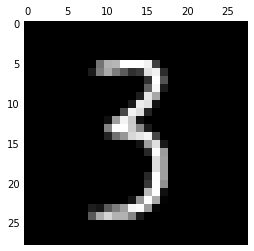

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 讀入 MNIST
mnist = input_data.read_data_sets("data/", one_hot = True)
x_train = mnist.train.images

# 印出
first_train_img = np.reshape(x_train[getint, :], (28, 28))
plt.matshow(first_train_img, cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 讀入 MNIST
mnist = input_data.read_data_sets("data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

# 設定參數
learning_rate = 0.5
training_steps = 55000
batch_size = 100
logs_path = 'TensorBoard/'
n_features = x_train.shape[1]
n_labels = y_train.shape[1]

# 建立 Feeds
with tf.name_scope('Inputs'):
    x = tf.placeholder(tf.float32, [None, n_features], name = 'Input_Data')
with tf.name_scope('Labels'):
    y = tf.placeholder(tf.float32, [None, n_labels], name = 'Label_Data')

# 建立 Variables
with tf.name_scope('ModelParameters'):
    W = tf.Variable(tf.zeros([n_features, n_labels]), name = 'Weights')
    b = tf.Variable(tf.zeros([n_labels]), name = 'Bias')

# 開始建構深度學習模型
with tf.name_scope('Model'):
    # Softmax
    prediction = tf.nn.softmax(tf.matmul(x, W) + b)
with tf.name_scope('CrossEntropy'):
    # Cross-entropy
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction), reduction_indices = 1))
    tf.summary.scalar("Loss", loss)
with tf.name_scope('GradientDescent'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('Accuracy', acc)

# 初始化
init = tf.global_variables_initializer()

# 開始執行運算
sess = tf.Session()
sess.run(init)

# 將視覺化輸出
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(logs_path, graph = tf.get_default_graph())

# 訓練
for step in range(training_steps):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys})
    if step % 5000 == 0:
        print(sess.run(loss, feed_dict = {x: batch_xs, y: batch_ys}))
        summary = sess.run(merged, feed_dict = {x: batch_xs, y: batch_ys})
        writer.add_summary(summary, step)

print("---")
# 準確率
print("準確率: ", sess.run(acc, feed_dict={x: x_test, y: y_test}))

sess.close()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
1.80715
0.232697
0.130667
0.115492
0.270667
0.136003
0.178085
0.260845
0.213334
0.258556
0.280984
---
準確率:  0.9223
